## Student Performance Prediction

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Read data

In [3]:
df=pd.read_csv('Student_performance_new.csv')

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0.0


In [5]:
df.shape

(2392, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              2
dtype: int64

In [7]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.GradeClass=df.GradeClass.astype(int)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


#### Visualisation for weekly study time and grade

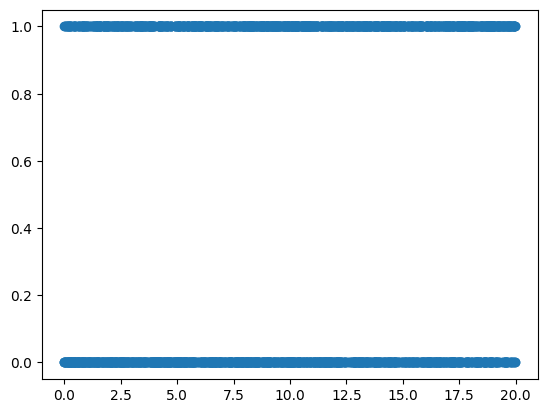

In [37]:
from matplotlib import pyplot as plt
plt.scatter(df.StudyTimeWeekly,df.GradeClass)

In [12]:
list(df.GradeClass.unique())  # Getting target value as list

[1, 0]

#### Splitting x and y

In [13]:
x=df.drop("GradeClass",axis=1)
x.head(3)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602


In [15]:
y=df.GradeClass
print(y.value_counts()) # Getting count of target

GradeClass
0    1211
1    1181
Name: count, dtype: int64


#### Using train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.1)

#### Apllying into the model

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
model.fit(X_train,y_train) # fit into the model

LogisticRegression()

In [19]:
predict=list(model.predict(X_test))
predict[0:10]

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

In [20]:
model_prob=list(model.predict_proba(X_test))
model_prob[0:10]

[array([0.18649388, 0.81350612]),
 array([0.61915586, 0.38084414]),
 array([0.14450461, 0.85549539]),
 array([0.0104344, 0.9895656]),
 array([0.99696363, 0.00303637]),
 array([0.13376079, 0.86623921]),
 array([0.99319289, 0.00680711]),
 array([0.87162073, 0.12837927]),
 array([0.00285126, 0.99714874]),
 array([0.02457669, 0.97542331])]

#### Getting score

In [21]:
model.score(X_train,y_train)

0.9121338912133892

#### Prediction for grade 1

In [22]:
model.predict([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])   # row 1 o/p=>1

array([1])

#### Prediction for grade 0

In [23]:
model.predict([[1003,15,0,2,3,4.210569,26,0,2,0,0,0,0,0.1126022]])   # row 3 o/p=>0

array([0])

#### Getting values of coefficient and intercept

In [24]:
coefficient=list(model.coef_)
coefficient

[array([ 0.00126358, -0.06411311,  0.02734274,  0.18572708,  0.10368441,
         0.09444137, -0.35862741,  0.75887978,  0.45426826,  0.45944819,
         0.65403896,  0.21821824, -0.53855789,  0.53188108])]

In [26]:
intercept=model.intercept_
intercept

array([-0.097778])

#### Applying sigmoid function

In [27]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [28]:
def prediction_function(StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA):
    z = coefficient[0][0] * StudentID + coefficient[0][1]*Age+ coefficient[0][2]*Gender+coefficient[0][3]*Ethnicity +coefficient[0][4]*ParentalEducation+coefficient[0][5]*StudyTimeWeekly+coefficient[0][6]*Absences+coefficient[0][7]*Tutoring+coefficient[0][8]*ParentalSupport+coefficient[0][9]*Extracurricular+coefficient[0][10]*Sports+coefficient[0][11]*Music+coefficient[0][12]*Volunteering+coefficient[0][13]*GPA+intercept
    y = sigmoid(z)
    return y

#### Prediction for 13 th row 

In [29]:
prediction_function(1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200)

0.027366685330738747

##### 0.027366685330738747 is less than 0.5 hence,his grade will be 0

In [30]:
model.predict([[1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200]])

array([0])

In [31]:
model.predict_proba([[1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200]])

array([[0.97263331, 0.02736669]])

#### Prediction for 1 st row

In [32]:
prediction_function(1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196)

0.9576373405981244

##### 0.9576373405981244 is greater than 0.5 hence,his grade will be 1

In [33]:
model.predict_proba([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])

array([[0.04236266, 0.95763734]])

In [34]:
model.predict([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])

array([1])